In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
train_df = train_df[["Id", "MSZoning", "Street", "Alley", "Neighborhood", "Condition1", "Condition2", "LotArea", "1stFlrSF", "2ndFlrSF", 
                     "GrLivArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd","SalePrice"]]
test_df = test_df[["Id", "MSZoning", "Street", "Alley", "Neighborhood", "Condition1", "Condition2", "LotArea", "1stFlrSF", "2ndFlrSF", 
                     "GrLivArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd"]]
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,1,RL,Pave,NaN,CollgCr,Norm,Norm,8450,856,854,1710,7,5,2003,2003,208500
1,2,RL,Pave,NaN,Veenker,Feedr,Norm,9600,1262,0,1262,6,8,1976,1976,181500
2,3,RL,Pave,NaN,CollgCr,Norm,Norm,11250,920,866,1786,7,5,2001,2002,223500
3,4,RL,Pave,NaN,Crawfor,Norm,Norm,9550,961,756,1717,7,5,1915,1970,140000
4,5,RL,Pave,NaN,NoRidge,Norm,Norm,14260,1145,1053,2198,8,5,2000,2000,250000


In [4]:
train_df.isnull().sum()

Id                 0
MSZoning           0
Street             0
Alley           1369
Neighborhood       0
Condition1         0
Condition2         0
LotArea            0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64

In [5]:
# freq_Alley = train_df.Alley.dropna().mode()[0]
# train_df.Alley.value_counts()

In [6]:
# unko = train_df.dropna()
# unko = unko.replace({'Pave': 1, 'Grvl': 0})
# unko.head()

In [7]:
# colormap = plt.cm.RdBu
# plt.figure(figsize=(10,10))
# sns.heatmap(unko.corr(), linewidths=0.1,vmax=1.0,  square=True, cmap=colormap, linecolor='white', annot=True)

In [8]:
train_df['Alley'].fillna('Na', inplace=True)
test_df['Alley'].fillna('Na', inplace=True)
for dataset in combine:
    dataset['Alley'] = dataset['Alley'].map({'Grvl': 0, 'Pave': 1, 'Na': 2})

In [9]:
freq = test_df.MSZoning.dropna().mode()[0]
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].fillna(freq)

In [10]:
train_df.replace({'Pave': 1, 'Grvl': 0},inplace=True)
test_df.replace({'Pave': 1, 'Grvl': 0},inplace=True)
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,1,RL,1,2,CollgCr,Norm,Norm,8450,856,854,1710,7,5,2003,2003,208500
1,2,RL,1,2,Veenker,Feedr,Norm,9600,1262,0,1262,6,8,1976,1976,181500
2,3,RL,1,2,CollgCr,Norm,Norm,11250,920,866,1786,7,5,2001,2002,223500
3,4,RL,1,2,Crawfor,Norm,Norm,9550,961,756,1717,7,5,1915,1970,140000
4,5,RL,1,2,NoRidge,Norm,Norm,14260,1145,1053,2198,8,5,2000,2000,250000


In [11]:
for dataset in combine:
    dataset['Newness'] = (2019 - dataset['YearRemodAdd']) + (2019 - dataset['YearBuilt'])
    
train_df = train_df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
test_df = test_df.drop(['YearRemodAdd', 'YearBuilt'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,OverallQual,OverallCond,SalePrice,Newness
0,1,RL,1,2,CollgCr,Norm,Norm,8450,856,854,1710,7,5,208500,32
1,2,RL,1,2,Veenker,Feedr,Norm,9600,1262,0,1262,6,8,181500,86
2,3,RL,1,2,CollgCr,Norm,Norm,11250,920,866,1786,7,5,223500,35
3,4,RL,1,2,Crawfor,Norm,Norm,9550,961,756,1717,7,5,140000,153
4,5,RL,1,2,NoRidge,Norm,Norm,14260,1145,1053,2198,8,5,250000,38


In [12]:
for dataset in combine:
    dataset['Quality'] = dataset['OverallQual'] * dataset['OverallCond']

train_df = train_df.drop(['OverallQual', 'OverallCond'], axis=1)
test_df = test_df.drop(['OverallQual', 'OverallCond'], axis=1)
combine = [train_df, test_df]

In [13]:
test_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,1stFlrSF,2ndFlrSF,GrLivArea,Newness,Quality
0,1461,RH,1,2,NAmes,Feedr,Norm,11622,896,0,896,116,30
1,1462,RL,1,2,NAmes,Norm,Norm,14267,1329,0,1329,122,36
2,1463,RL,1,2,Gilbert,Norm,Norm,13830,928,701,1629,43,25
3,1464,RL,1,2,Gilbert,Norm,Norm,9978,926,678,1604,42,36
4,1465,RL,1,2,StoneBr,Norm,Norm,5005,1280,0,1280,54,40


In [14]:
for dataset in combine:
    dataset['HouseSize'] = dataset['1stFlrSF'] + dataset['2ndFlrSF'] + dataset['GrLivArea']
    
train_df = train_df.drop(['1stFlrSF', '2ndFlrSF','GrLivArea'], axis=1)
test_df = test_df.drop(['1stFlrSF', '2ndFlrSF','GrLivArea'], axis=1)
combine = [train_df, test_df]

In [15]:
test_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,Newness,Quality,HouseSize
0,1461,RH,1,2,NAmes,Feedr,Norm,11622,116,30,1792
1,1462,RL,1,2,NAmes,Norm,Norm,14267,122,36,2658
2,1463,RL,1,2,Gilbert,Norm,Norm,13830,43,25,3258
3,1464,RL,1,2,Gilbert,Norm,Norm,9978,42,36,3208
4,1465,RL,1,2,StoneBr,Norm,Norm,5005,54,40,2560


In [16]:
for dataset in combine:
    dataset['MSZoning'] = dataset['MSZoning'].map({'A': 0, 'C (all)': 1, 'FV': 2, 'I': 3, 'RH': 4, 'RL': 5, 'RP': 6, 'RM': 7})
    dataset['Neighborhood'] = dataset['Neighborhood'].map({'Blmngtn': 0, 'Blueste': 1, 'BrDale': 2, 'BrkSide': 3, 'ClearCr': 4, 'CollgCr': 5
                                                          , 'Crawfor': 6, 'Edwards': 7, 'Gilbert': 8, 'IDOTRR': 9, 'MeadowV': 10, 'Mitchel': 11, 'NAmes': 12, 'NoRidge': 13
                                                          , 'NPkVill': 14, 'NridgHt': 15, 'NWAmes': 16, 'OldTown': 17, 'SWISU': 18, 'Sawyer': 19, 
                                                           'SawyerW': 20, 'Somerst': 21, 'StoneBr': 22, 'Timber': 23, 'Veenker': 24})

In [17]:
train_df.head()
# train_df.Neighborhood.value_counts()

,Id,MSZoning,Street,Alley,Neighborhood,Condition1,Condition2,LotArea,SalePrice,Newness,Quality,HouseSize
0,1,5,1,2,5,Norm,Norm,8450,208500,32,35,3420
1,2,5,1,2,24,Feedr,Norm,9600,181500,86,48,2524
2,3,5,1,2,5,Norm,Norm,11250,223500,35,35,3572
3,4,5,1,2,6,Norm,Norm,9550,140000,153,35,3434
4,5,5,1,2,13,Norm,Norm,14260,250000,38,40,4396


In [18]:
for dataset in combine:
    dataset['toArtery'] = 0
    dataset.loc[dataset['Condition1'] == 'Artery', 'toArtery'] = 1
    dataset.loc[dataset['Condition2'] == 'Artery', 'toArtery'] = 1
    
    dataset['toFeedr'] = 0
    dataset.loc[dataset['Condition1'] == 'Feedr', 'toFeedr'] = 1
    dataset.loc[dataset['Condition2'] == 'Feedr', 'toFeedr'] = 1
    
    dataset['isNorm'] = 0
    dataset.loc[dataset['Condition1'] == 'Norm', 'isNorm'] = 1
    dataset.loc[dataset['Condition2'] == 'Norm', 'isNorm'] = 1
    
    dataset['isRRNn'] = 0
    dataset.loc[dataset['Condition1'] == 'RRNn', 'isRRNn'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNn', 'isRRNn'] = 1
    
    dataset['isRRAn'] = 0
    dataset.loc[dataset['Condition1'] == 'RRAn', 'isRRAn'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAn', 'isRRAn'] = 1
    
    dataset['isPosN'] = 0
    dataset.loc[dataset['Condition1'] == 'PosN', 'isPosN'] = 1
    dataset.loc[dataset['Condition2'] == 'PosN', 'isPosN'] = 1
    
    dataset['isPosA'] = 0
    dataset.loc[dataset['Condition1'] == 'PosA', 'isPosA'] = 1
    dataset.loc[dataset['Condition2'] == 'PosA', 'isPosA'] = 1
    
    dataset['isRRNe'] = 0
    dataset.loc[dataset['Condition1'] == 'RRNe', 'isRRNe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRNe', 'isRRNe'] = 1
    
    dataset['isRRAe'] = 0
    dataset.loc[dataset['Condition1'] == 'RRAe', 'isRRAe'] = 1
    dataset.loc[dataset['Condition2'] == 'RRAe', 'isRRAe'] = 1
    
train_df = train_df.drop(['Condition1', 'Condition2'], axis=1)
test_df = test_df.drop(['Condition1', 'Condition2'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,8450,208500,32,35,3420,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,9600,181500,86,48,2524,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,11250,223500,35,35,3572,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,9550,140000,153,35,3434,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,14260,250000,38,40,4396,0,0,1,0,0,0,0,0,0


In [19]:
train_df['Quality_band'] = pd.cut(train_df['Quality'], 5)
train_df[['Quality_band', 'SalePrice']].groupby(['Quality_band'], as_index=False).mean().sort_values(by='Quality_band', ascending=True)

,Quality_band,SalePrice
0,"(0.911, 18.8]",98205.593750
1,"(18.8, 36.6]",157973.754386
2,"(36.6, 54.4]",243935.367089
3,"(54.4, 72.2]",254291.666667
4,"(72.2, 90.0]",400000.000000


In [20]:
for dataset in combine:
    dataset.loc[ dataset['Quality'] <= 18.8, 'Quality'] = 0
    dataset.loc[(dataset['Quality'] > 18.8) & (dataset['Quality'] <= 36.6), 'Quality'] = 1
    dataset.loc[(dataset['Quality'] > 36.6) & (dataset['Quality'] <= 54.4), 'Quality'] = 2
    dataset.loc[(dataset['Quality'] > 54.4) & (dataset['Quality'] <= 72.2), 'Quality'] = 3
    dataset.loc[ dataset['Quality'] >72.2, 'Quality'] = 4

train_df = train_df.drop(['Quality_band'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,8450,208500,32,1,3420,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,9600,181500,86,2,2524,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,11250,223500,35,1,3572,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,9550,140000,153,1,3434,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,14260,250000,38,2,4396,0,0,1,0,0,0,0,0,0


In [21]:
train_df['new_band'] = pd.cut(train_df['Newness'], 5)
train_df[['new_band', 'SalePrice']].groupby(['new_band'], as_index=False).mean().sort_values(by='new_band', ascending=True)

,new_band,SalePrice
0,"(17.81, 56.0]",237547.910747
1,"(56.0, 94.0]",168274.320872
2,"(94.0, 132.0]",142583.625344
3,"(132.0, 170.0]",125091.158163
4,"(170.0, 208.0]",110947.193548


In [22]:
for dataset in combine:
    dataset.loc[ dataset['Newness'] <= 56, 'Newness'] = 0
    dataset.loc[(dataset['Newness'] > 56) & (dataset['Newness'] <= 94), 'Newness'] = 1
    dataset.loc[(dataset['Newness'] > 94) & (dataset['Newness'] <= 132), 'Newness'] = 2
    dataset.loc[(dataset['Newness'] > 132) & (dataset['Newness'] <= 170), 'Newness'] = 3
    dataset.loc[ dataset['Newness'] >170, 'Newness'] = 4

train_df = train_df.drop(['new_band'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,8450,208500,0,1,3420,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,9600,181500,1,2,2524,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,11250,223500,0,1,3572,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,9550,140000,3,1,3434,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,14260,250000,0,2,4396,0,0,1,0,0,0,0,0,0


In [23]:
train_df['LotArea_band'] = pd.cut(train_df['LotArea'], 5)
train_df[['LotArea_band', 'SalePrice']].groupby(['LotArea_band'], as_index=False).mean().sort_values(by='LotArea_band', ascending=True)

,LotArea_band,SalePrice
0,"(1086.055, 44089.0]",179890.114720
1,"(44089.0, 86878.0]",295666.666667
2,"(86878.0, 129667.0]",302000.000000
3,"(129667.0, 172456.0]",252975.000000
4,"(172456.0, 215245.0]",375000.000000


In [24]:
for dataset in combine:
    dataset.loc[ dataset['LotArea'] <= 44089, 'LotArea'] = 0
    dataset.loc[(dataset['LotArea'] > 44089) & (dataset['LotArea'] <= 86878), 'LotArea'] = 1
    dataset.loc[(dataset['LotArea'] > 86878) & (dataset['LotArea'] <= 129667), 'LotArea'] = 2
    dataset.loc[(dataset['LotArea'] > 129667) & (dataset['LotArea'] <= 172456), 'LotArea'] = 3
    dataset.loc[ dataset['LotArea'] >172456, 'LotArea'] = 4

train_df = train_df.drop(['LotArea_band'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,0,208500,0,1,3420,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,0,181500,1,2,2524,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,0,223500,0,1,3572,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,0,140000,3,1,3434,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,0,250000,0,2,4396,0,0,1,0,0,0,0,0,0


In [25]:
train_df['HouseSize_band'] = pd.cut(train_df['HouseSize'], 5)
train_df[['HouseSize_band', 'SalePrice']].groupby(['HouseSize_band'], as_index=False).mean().sort_values(by='HouseSize_band', ascending=True)

,HouseSize_band,SalePrice
0,"(657.384, 2791.2]",132340.880845
1,"(2791.2, 4914.4]",210152.586445
2,"(4914.4, 7037.6]",318737.275362
3,"(7037.6, 9160.8]",708333.333333
4,"(9160.8, 11284.0]",172375.000000


In [26]:
for dataset in combine:
    dataset.loc[ dataset['HouseSize'] <= 2791.2, 'HouseSize'] = 0
    dataset.loc[(dataset['HouseSize'] > 2791.2) & (dataset['HouseSize'] <= 4914.4), 'HouseSize'] = 1
    dataset.loc[(dataset['HouseSize'] > 4914.4) & (dataset['HouseSize'] <= 1297037.6667), 'HouseSize'] = 2
    dataset.loc[(dataset['HouseSize'] > 7037.6) & (dataset['HouseSize'] <= 9160.8), 'HouseSize'] = 3
    dataset.loc[ dataset['HouseSize'] >9160.8, 'HouseSize'] = 4

train_df = train_df.drop(['HouseSize_band'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Id,MSZoning,Street,Alley,Neighborhood,LotArea,SalePrice,Newness,Quality,HouseSize,toArtery,toFeedr,isNorm,isRRNn,isRRAn,isPosN,isPosA,isRRNe,isRRAe
0,1,5,1,2,5,0,208500,0,1,1,0,0,1,0,0,0,0,0,0
1,2,5,1,2,24,0,181500,1,2,0,0,1,1,0,0,0,0,0,0
2,3,5,1,2,5,0,223500,0,1,1,0,0,1,0,0,0,0,0,0
3,4,5,1,2,6,0,140000,3,1,1,0,0,1,0,0,0,0,0,0
4,5,5,1,2,13,0,250000,0,2,1,0,0,1,0,0,0,0,0,0


-0.9001305945040659


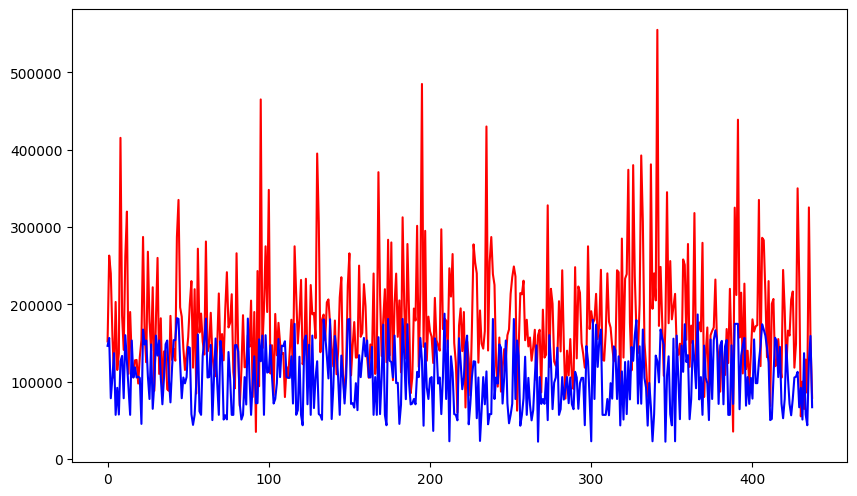

In [27]:
X = train_df.drop(["SalePrice","Id"], axis=1)
Y = train_df["SalePrice"]

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=True)

regr = LinearSVR(C=1, dual=True, epsilon=1, fit_intercept=True, intercept_scaling=1.0,
          loss='epsilon_insensitive', max_iter=10000, random_state=None,
          tol=0.0001, verbose=0)
regr.fit(x_train, y_train)
pred = regr.predict(x_test)
print(regr.score(x_train, y_train))

plt.figure(figsize=(10,6), dpi=100)
plt.plot(np.array(y_test), c='r')
plt.plot(pred, c='b')
# plt.savefig('all_start_scaling.png')
plt.show()

In [28]:
X_test =  test_df.drop("Id", axis=1)

regr.fit(X, Y)
Y_pred = regr.predict(X_test)
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': Y_pred})
output.to_csv('original_fifth.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
